### Task 1- Data Preprocessing
##### Submitted By Hetal Patel Dholu

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Missing Percetages")
for iterator in df.columns:
    print(iterator,":",df[iterator].isnull().sum()*100/df.shape[0],"%")

Missing Percetages
PassengerId : 0.0 %
Survived : 0.0 %
Pclass : 0.0 %
Name : 0.0 %
Sex : 0.0 %
Age : 19.865319865319865 %
SibSp : 0.0 %
Parch : 0.0 %
Ticket : 0.0 %
Fare : 0.0 %
Cabin : 77.10437710437711 %
Embarked : 0.2244668911335578 %


In [6]:
#from the above analysis, foloowing have missing values,
#Age --less than 20% so we will do median imputation
#Cabin → drop OR convert to binary (HasCabin)
#Embarked less than 20%..we will do mode imputation

In [7]:
#imputing age
median_age = df['Age'].median()
df['Age'].fillna(median_age,inplace=True)

In [8]:
print("The missing values of age has been imputed with : ",median_age)

The missing values of age has been imputed with :  28.0


In [9]:
df['Age'].isnull().sum()

np.int64(0)

In [10]:
# Fill missing Embarked with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
df['Embarked'].isnull().sum()

np.int64(0)

In [12]:
display(df['Cabin'].value_counts())
display(f"The cabin has unique values = {df['Cabin'].nunique()}")

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

'The cabin has unique values = 147'

_The Cabin column has 77% missing values, which is too high for reliable imputation. It also has many unique values, making encoding difficult and potentially leading to overfitting. Therefore, we drop it to simplify preprocessing, while other features like Pclass and Fare can capture the relevant information_

In [13]:
#dropping Cabin
df.drop('Cabin',axis=1,inplace=True)

### Encoding

In [14]:
#encoding Sex
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])

In [15]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [16]:
#Encoding Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,False,False


_Handling `Name` and `Ticket` columns_
- Both `Name` and `Ticket` are **text-heavy categorical features** that do not add much predictive power in their raw form.  
- Extracting features like **Title** from `Name` or **Ticket Prefix/Group Size** is possible, but for simplicity, we will **not encode these columns** and drop them instead.  


In [18]:
df.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [19]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.25,False,True


### Normalizing / Standardizing Numerical Features

In [20]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Age','Fare','SibSp','Parch']
scaler = StandardScaler()
scaler.fit_transform(df[numerical_features])

array([[-0.56573646, -0.50244517,  0.43279337, -0.47367361],
       [ 0.66386103,  0.78684529,  0.43279337, -0.47367361],
       [-0.25833709, -0.48885426, -0.4745452 , -0.47367361],
       ...,
       [-0.1046374 , -0.17626324,  0.43279337,  2.00893337],
       [-0.25833709, -0.04438104, -0.4745452 , -0.47367361],
       [ 0.20276197, -0.49237783, -0.4745452 , -0.47367361]])

### Visualize outliers using boxplots and remove them.

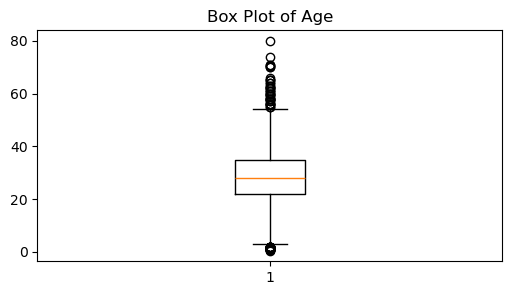

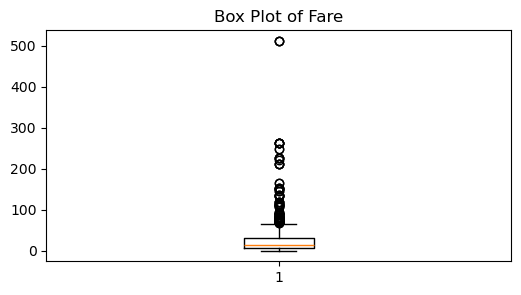

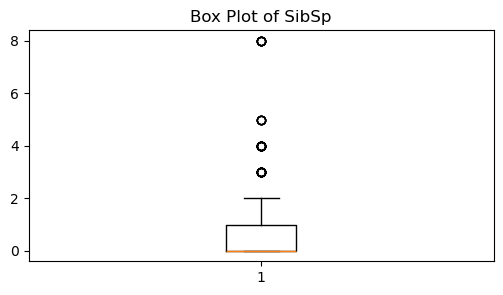

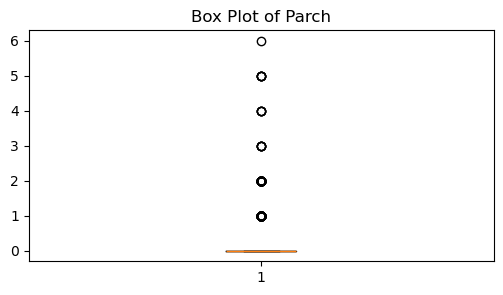

In [21]:
import matplotlib.pyplot as plt
for i in numerical_features:
    plt.figure(figsize=(6,3))
    plt.boxplot(x=df[i])
    plt.title(f"Box Plot of {i}")
    plt.show()

In [22]:
def remove_outlier(df,col):
    for i in col:
        q1= df[i].quantile(0.25)
        q3= df[i].quantile(0.75)
        iqr = q3-q1
        lower = q1-1.5*iqr
        upper = q3+1.5*iqr
        df = df[ (df[i] >= lower) & ( df[i] <= upper )]
    return df
    

In [23]:
df_clean = remove_outlier(df,numerical_features)

In [24]:
print("Shape before:",df.shape)
print("Shape After:",df_clean.shape)

Shape before: (891, 10)
Shape After: (577, 10)


In [25]:
df_clean

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True
5,6,0,3,1,28.0,0,0,8.4583,True,False
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,1,25.0,0,0,7.0500,False,True
886,887,0,2,1,27.0,0,0,13.0000,False,True
887,888,1,1,0,19.0,0,0,30.0000,False,True
889,890,1,1,1,26.0,0,0,30.0000,False,False


## Interview questions

### 1. What are the different types of missing data?
- **MCAR (Missing Completely at Random):** Missingness has no relation to data (e.g., random entry error).
- **MAR (Missing at Random):** Missingness depends on other observed features (e.g., income missing more for younger people).
- **MNAR (Missing Not at Random):** Missingness depends on the unobserved value itself (e.g., people with very high income don’t disclose it).

---

### 2. How do you handle categorical variables?
- **Label Encoding:** Convert categories into integers (good for ordinal data like `Low, Medium, High`).
- **One-Hot Encoding:** Create binary columns for each category (good for nominal data like `Embarked` = C, Q, S).
- **Frequency/Target Encoding (advanced):** Replace categories with counts or target-based statistics.

---

### 3. What is the difference between normalization and standardization?
- **Normalization:** Rescales data to a fixed range, usually [0, 1].  
  Formula: (x - min) / (max - min)  
- **Standardization:** Centers data to mean = 0, std = 1.  
  Formula: (x - mean) / std  
    Use normalization when scale matters, standardization when distribution matters.

---

### 4. How do you detect outliers?
- **Visualization:** Boxplots, scatterplots, histograms.
- **Statistical methods:** Z-score (>3 or <-3), IQR rule (values outside 1.5×IQR).
- **Model-based methods:** Isolation Forest, DBSCAN (advanced).

---

### 5. Why is preprocessing important in ML?
- Ensures **clean, consistent data**.
- Handles missing values, scales features, encodes categories.
- Reduces noise & outliers → better generalization.
- Improves model performance & accuracy.

---

### 6. What is one-hot encoding vs label encoding?
- **One-Hot Encoding:** Expands categories into multiple binary columns (no order assumed).
- **Label Encoding:** Assigns integer values to categories (order is assumed).
👉 Use one-hot for nominal, label encoding for ordinal.

---

### 7. How do you handle data imbalance?
- **Resampling:** Oversample minority class (SMOTE), undersample majority class.
- **Class weights:** Tell the model to give more importance to minority class.
- **Generate synthetic data:** Using algorithms like SMOTE.
- **Use metrics beyond accuracy:** Precision, Recall, F1, ROC AUC.

---

### 8. Can preprocessing affect model accuracy?
Yes, strongly!  
- Poor preprocessing (e.g., leaving outliers, not encoding properly) can reduce accuracy.  
- Good preprocessing → better scaling, less bias, improved model stability.  
